#### Gerardo Granados Aldaz   A01568072
#### Sebastian Salazar Villanueva  A01568158
#### Abraham Alejandro Saenz Tirado      A00823861

## Objetivo del proyecto: 
El propósito de este proyecto es poder elaborar un analisis exploratorio de
los libros empleando diversos algoritmos que estudiamos durante el curso. Analisis estadísticos,
algoritmos no supervisados y elementos de visualización serán sus principales herramientas para
este analisis. Adicionalmente cualquier algoritmo o herramienta que no hayamos visto durante el
curso es válida, sin embargo, es importante que conozcan el funcionamiento y puedan explicar lo
que se está realizando con claridad.

## Resultados del proyecto:
Los elementos mínimos que su analisis debe cumplir son los siguientes:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Para poder analizar los datos preprocesamos los textos a un .csv con los campos "campo: valor" antes de *** START OF THE PROJECT GUTENBERG EBOOK <<TITLE>> **
import glob
import regex as re
import requests

def create_csv(csv_name: str):
    # Dataframe para los libros
    df = pd.DataFrame(columns = ["Filename", "ID", "Title", "Author", "Language", "Release Date", "Subjects"])

    libros = glob.glob('./Gutenberg/*.txt')
    n = len(libros)

    # Iteramos por cada .txt
    for i, filename in enumerate(libros):
        print(f"Progress: {i:03d}/{n}    {i/n*100:.2f}%", end="\r")
        row = [filename]
        features = {"Title": None, "Author": None, "Language": None, "Release Date": None}

        with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
            # Itera sobre cada linea de texto
            for line in f:
                # Itera sobre las features excepto "Release Date"
                for feat in set(features) - {"Release Date"}:

                    match = re.search(fr"(?<={feat}:\s).*(?=$)", line)
                    if match:
                        features[feat] = match.group(0)

                # Matchea Release Date
                match = re.search(r"(?<=Release Date:\s).*(?=\s\[.*\]$)", line)
                if match:
                    features["Release Date"] = match.group(0)

                # Si ya tenemos todos los features, dejar de iterar por lineas de texto
                if None not in features.values():
                    break
                
                
        # Conseguir generos
        id = re.search(r'((?<!-)((?<=(pg)*)|(?<=^)))\d*((?=.txt)|(?=-0.txt))' ,filename).group(0)
        
        row.append(id)
        
        row.extend(features.values())
        
        # Subjects
        # Hacemos un request a gutendex, una API para el Proyecto Gutenberg para sacar los subjects
        r = requests.get(f'https://gutendex.com/books/{id}')
        subjects = r.json().get('subjects')
        # print(subjects)
        
        row.append(subjects)
        
        if None not in row:
            df.loc[len(df)] = row

    df.set_index("Filename")
    df.to_csv(csv_name, index=False)
    return df

In [3]:
import os.path

fname = 'gutenberg.csv'

# importar de csv si ya existe
if os.path.isfile(fname):
    df = pd.read_csv(fname)
else:
    df = create_csv(fname)
    
df

,Filename,ID,Title,Author,Language,Release Date,Subjects
0,./Gutenberg\24747-0.txt,24747,Samlede værker,Jeppe Aakjær,Danish,"March 3, 2008",[Danish poetry]
1,./Gutenberg\27566-0.txt,27566,La Force,Paul Adam,French,"December 19, 2008","[Historical fiction, Napoleonic Wars, 1800-181..."
2,./Gutenberg\33378-0.txt,33378,Au soleil de juillet (1829-1830),Paul Adam,French,"August 8, 2010","[France -- History -- July Revolution, 1830 --..."
3,./Gutenberg\36460-0.txt,36460,Cœur-de-panthère,Gustave Aimard,French,"June 18, 2011","[Adventure and adventurers -- Fiction, Western..."
4,./Gutenberg\39331-0.txt,39331,Histoire des salons de Paris (Tome 1/6),"Laure Junot, duchesse d'Abrantès",French,"April 1, 2012","[Paris (France) -- Intellectual life, Paris (F..."
...,...,...,...,...,...,...,...
192,./Gutenberg\pg70639.txt,70639,"The Life and Adventures of Alexander Selkirk, ...",John Howell,English,"April 24, 2023","[Defoe, Daniel, 1661?-1731. Robinson Crusoe, S..."
193,./Gutenberg\pg70640.txt,70640,Third Base Thatcher,Everett (Deacon) Scott,English,"April 24, 2023","[Baseball -- Juvenile fiction, Baseball storie..."
194,./Gutenberg\pg70642.txt,70642,"Historical Vignettes, 1st Series",Bernard Capes,English,"April 25, 2023","[Historical fiction, Short stories, English]"
195,./Gutenberg\pg70643.txt,70643,Coca and Cocaine,William Martindale,English,"April 26, 2023","[Coca, Cocaine]"


In [4]:
# Separamos libros por idioma
languages = df['Language'].unique()

# Diccionario con los dataframes por idioma
df_langs = {}
for lang in languages:
    new_df = df[df['Language'] == lang]
    df_langs[lang] = new_df
    print(lang, len(new_df))

Danish 3
French 57
Spanish 86
English 47
English and Spanish 2
Iloko, Spanish 2


In [5]:
# Combinamos los generos a una sola lista y ordenamos por tamaño

subjects = sorted(list(set([a for b in df.Subjects.tolist() for a in b])), key=len)

subjects, len(subjects)

(['Coca',
  'Stars',
  'Syrups',
  'Farces',
  'Poetry',
  'Maxims',
  'Fiction',
  'Indexes',
  'Readers',
  'Cooking',
  'Cocaine',
  'Liquors',
  'Marriage',
  'Equality',
  'Comedies',
  'Sainetes',
  'Explorers',
  'Composers',
  'Travelers',
  'Gran Chaco',
  'Fairy tales',
  'War stories',
  'Horror tales',
  'Love stories',
  'Solar system',
  'Danish poetry',
  'Spanish drama',
  'Short stories',
  'Danish fiction',
  'Cuban question',
  'Spanish fiction',
  'Western stories',
  'Thesis (Ph. D.)',
  'Fantasy fiction',
  'Science fiction',
  'Music -- France',
  'Humorous stories',
  'Mythology, Greek',
  'Domestic fiction',
  'Baseball stories',
  'Argentine poetry',
  'Ballads, Spanish',
  'Police -- Fiction',
  'Clergy -- Fiction',
  'Arabs -- Folklore',
  'Political fiction',
  'Aztecs -- Fiction',
  'Christian fiction',
  'Marriage -- Humor',
  'France -- Fiction',
  'Miners -- Fiction',
  'Mexico -- Fiction',
  'Adventure stories',
  'Christmas stories',
  'Historical fic

In [6]:
# Estan sucios los datos con generos demasiado largos y especificos, estos generos tienen '--' vamos a quitar esos generos

subjects = [sub for sub in subjects if '--' not in sub and '(' not in sub]
subjects

['Coca',
 'Stars',
 'Syrups',
 'Farces',
 'Poetry',
 'Maxims',
 'Fiction',
 'Indexes',
 'Readers',
 'Cooking',
 'Cocaine',
 'Liquors',
 'Marriage',
 'Equality',
 'Comedies',
 'Sainetes',
 'Explorers',
 'Composers',
 'Travelers',
 'Gran Chaco',
 'Fairy tales',
 'War stories',
 'Horror tales',
 'Love stories',
 'Solar system',
 'Danish poetry',
 'Spanish drama',
 'Short stories',
 'Danish fiction',
 'Cuban question',
 'Spanish fiction',
 'Western stories',
 'Fantasy fiction',
 'Science fiction',
 'Humorous stories',
 'Mythology, Greek',
 'Domestic fiction',
 'Baseball stories',
 'Argentine poetry',
 'Ballads, Spanish',
 'Political fiction',
 'Christian fiction',
 'Adventure stories',
 'Christmas stories',
 'Historical fiction',
 'Argentine literature',
 'Mythology, Classical',
 'Classical literature',
 'Psychological fiction',
 'Short stories, French',
 'Ice cream, ices, etc.',
 'Short stories, Spanish',
 'Short stories, English',
 'Solomon, King of Israel',
 'Formulas, recipes, etc.',
 

In [7]:
# Siguen sucios con comas, ahora dejamos solo la primera parte de los generos con coma y quitamos duplicados
subjects = list(set([sub.split(',')[0] for sub in subjects]))
subjects

['Farces',
 'Cooking',
 'Danish fiction',
 'Western stories',
 'Readers',
 'Danish poetry',
 'Cocaine',
 'Psychological fiction',
 'Spanish drama',
 'Coca',
 'Gran Chaco',
 'Syrups',
 'Classical literature',
 'Fairy tales',
 'Solar system',
 'Adventure stories',
 'Ice cream',
 'Historical fiction',
 'Solomon',
 'Speeches',
 'Defoe',
 'Fantasy fiction',
 'Marriage',
 'Poetry',
 'Indexes',
 'Humorous stories',
 'Explorers',
 'Mythology',
 'Maxims',
 'Equality',
 'Domestic fiction',
 'Sainetes',
 'Argentine literature',
 'Travelers',
 'Baseball stories',
 'Spanish fiction',
 'Comedies',
 'Science fiction',
 'Horror tales',
 'Garay',
 'Picaresque literature',
 'Detective and mystery stories',
 'Stars',
 'Formulas',
 'Christmas stories',
 'Abbadie',
 'Cuban question',
 'Seven Reductions',
 'Love stories',
 'Christian fiction',
 'Leonardo',
 'Fiction',
 'Argentine poetry',
 'Spanish-American War',
 'Juana',
 'Short stories',
 'Composers',
 'War stories',
 'Liquors',
 'Ballads',
 'Alberti',
 

In [8]:
# Ya limpios podemos decidir los generos manualmente
genres = ['Fiction',
 'Fairy tales',
 'Political fiction',
 'Detective and mystery stories',
 'Mythology',
 'Sainetes',
 'Ballads',
 'Fantasy fiction',
 'Classical literature',
 'Christmas stories',
 'Speeches',
 'Short stories',
 'Cooking',
 'Baseball stories',
 'Picaresque literature',
 'Farces',
 'Historical fiction',
 'Domestic fiction',
 'Horror tales',
 'War stories',
 'Comedies',
 'Christian fiction',
 'Science fiction',
 'Poetry',
 'Spanish drama',
 'Love stories',
 'Humorous stories',
 'Adventure stories',
 'Psychological fiction']

## 1. Contestar los siguientes cuestionamientos
### a. ¿Cuántos y cuales son los idiomas que identificaron en los libros?
5 Idiomas: Danés, Francés, Español, Inglés e Iloco. Unos estan en Ingles y Español y otros en Iloco y Español

### b. ¿Cuántos libros tenemos por cada idioma?
Danés: 3<br>
Francés: 57<br>
Español: 86<br>
Inglés: 47<br>
Ingles y Español: 2<br>
Iloco y Español: 2<br>

### c. ¿Cuántos géneros tenemos? y ¿Qué proceso utilizaron para identificar el (los) géneros del libro?
Conseguimos los generos con la ayuda de la API gutendex.com. Hicimos un request para sacar los subjects de cada libro<br>
Originalmente eran 304 temas diferentes, pero despues de limpiar, quedamos con 29 géneros que decidimos basados en los temas existentes

### ¿Encontraron algún otro patrón o elemento que consideren importante mencionar en su analisis?
Los temas eran demasiado especificos, incluian autores y años. Estos venían separados por un doble guión y tenían paréntesis. Otros incluían el idioma en el tema y genero, esos los eliminamos como duplicados porque tenemos el dato en otras partes del dataset.

2. Elemento de visualización<br>
    a. ¿Cuáles son las palabras con mayor frecuencia en cada idioma?<br>

In [10]:
# Cargar el dataframe desde el archivo CSV
df = pd.read_csv('gutenberg.csv')

# Separamos libros por idioma
languages = df['Language'].unique()

# Definir función para limpiar el texto
def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text

# Definir función para obtener las palabras con mayor frecuencia
def get_top_words(text, n=10):
    words = text.split()
    word_freq = {}
    for word in words:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    sorted_words = sorted(word_freq, key=word_freq.get, reverse=True)
    return sorted_words[:n]

# Iterar sobre los idiomas y obtener las palabras con mayor frecuencia
for lang in languages:
    lang_df = df[df['Language'] == lang]
    filenames = lang_df['Filename'].values
    top_words = []
    
    print(f"Idioma: {lang}")
    
    for filename in filenames:
        with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
            text = f.read()
            cleaned_text = clean_text(text)
            top_words.extend(get_top_words(cleaned_text))
    
    top_words_freq = pd.Series(top_words).value_counts().head(10)
    print(top_words_freq)
    print('---')


Idioma: Danish
og     3
i      3
en     3
det    3
at     2
paa    2
som    2
den    2
saa    1
til    1
dtype: int64
---
Idioma: French
le     57
de     56
la     56
et     53
les    53
un     43
que    41
il     37
en     33
des    24
dtype: int64
---
Idioma: Spanish
de     86
la     86
y      85
que    84
el     82
en     82
los    64
se     54
a      42
no     33
dtype: int64
---
Idioma: English
the     47
a       47
of      47
to      46
and     45
in      43
was     21
that    20
you     16
he      15
dtype: int64
---
Idioma: English and Spanish
de     2
y      2
que    2
en     2
el     2
la     2
the    2
se     1
es     1
los    1
dtype: int64
---
Idioma: Iloko, Spanish
the        2
iti        2
ti         2
of         2
project    2
to         2
no         2
or         2
de         2
and        2
dtype: int64
---


    b. ¿Es posible agrupar los libros mediante cluster de tal forma que se ilustren los
    grupos por idioma?
        i. De ser así genera una gráfica que ilustre esto<br>
        ii. Caso contario explica el motivo<br>
    c. Genera una grafica que ilustre la identificación de géneros en los libros

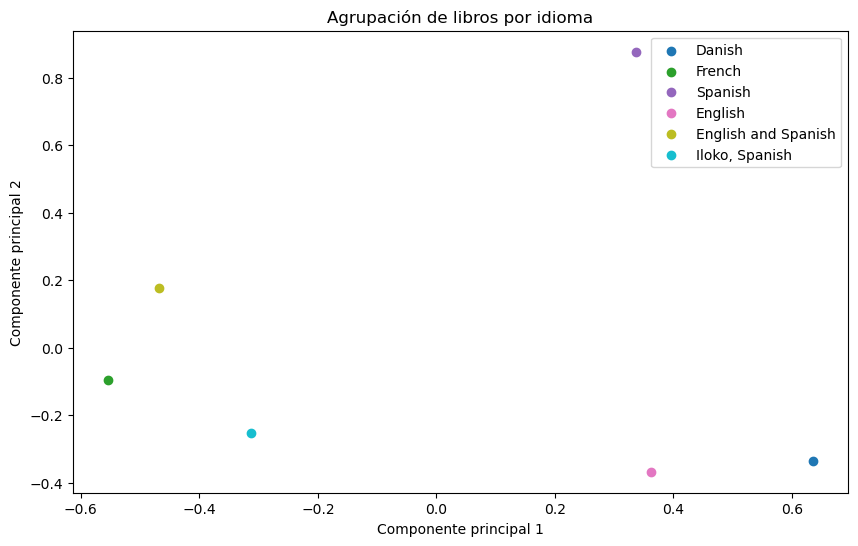

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Cargar el dataframe desde el archivo CSV
df = pd.read_csv('gutenberg.csv')

# Obtener los textos de los libros por idioma
languages = df['Language'].unique()
texts = []

for lang in languages:
    lang_df = df[df['Language'] == lang]
    filenames = lang_df['Filename'].values
    
    lang_text = ''
    for filename in filenames:
        with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
            text = f.read()
            lang_text += ' ' + text
    
    texts.append(lang_text)

# Vectorización de los textos
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Aplicar k-means
k = len(languages)  # Número de clusters igual al número de idiomas
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Obtener las etiquetas de cluster asignadas por k-means
labels = kmeans.labels_

# Generar la gráfica
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('tab10', k)  # Colores para los idiomas

for i, lang in enumerate(languages):
    lang_indices = [j for j, label in enumerate(labels) if label == i]
    plt.scatter(X_pca[lang_indices, 0], X_pca[lang_indices, 1], color=colors(i), label=lang)

plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Agrupación de libros por idioma')
plt.legend()
plt.show()


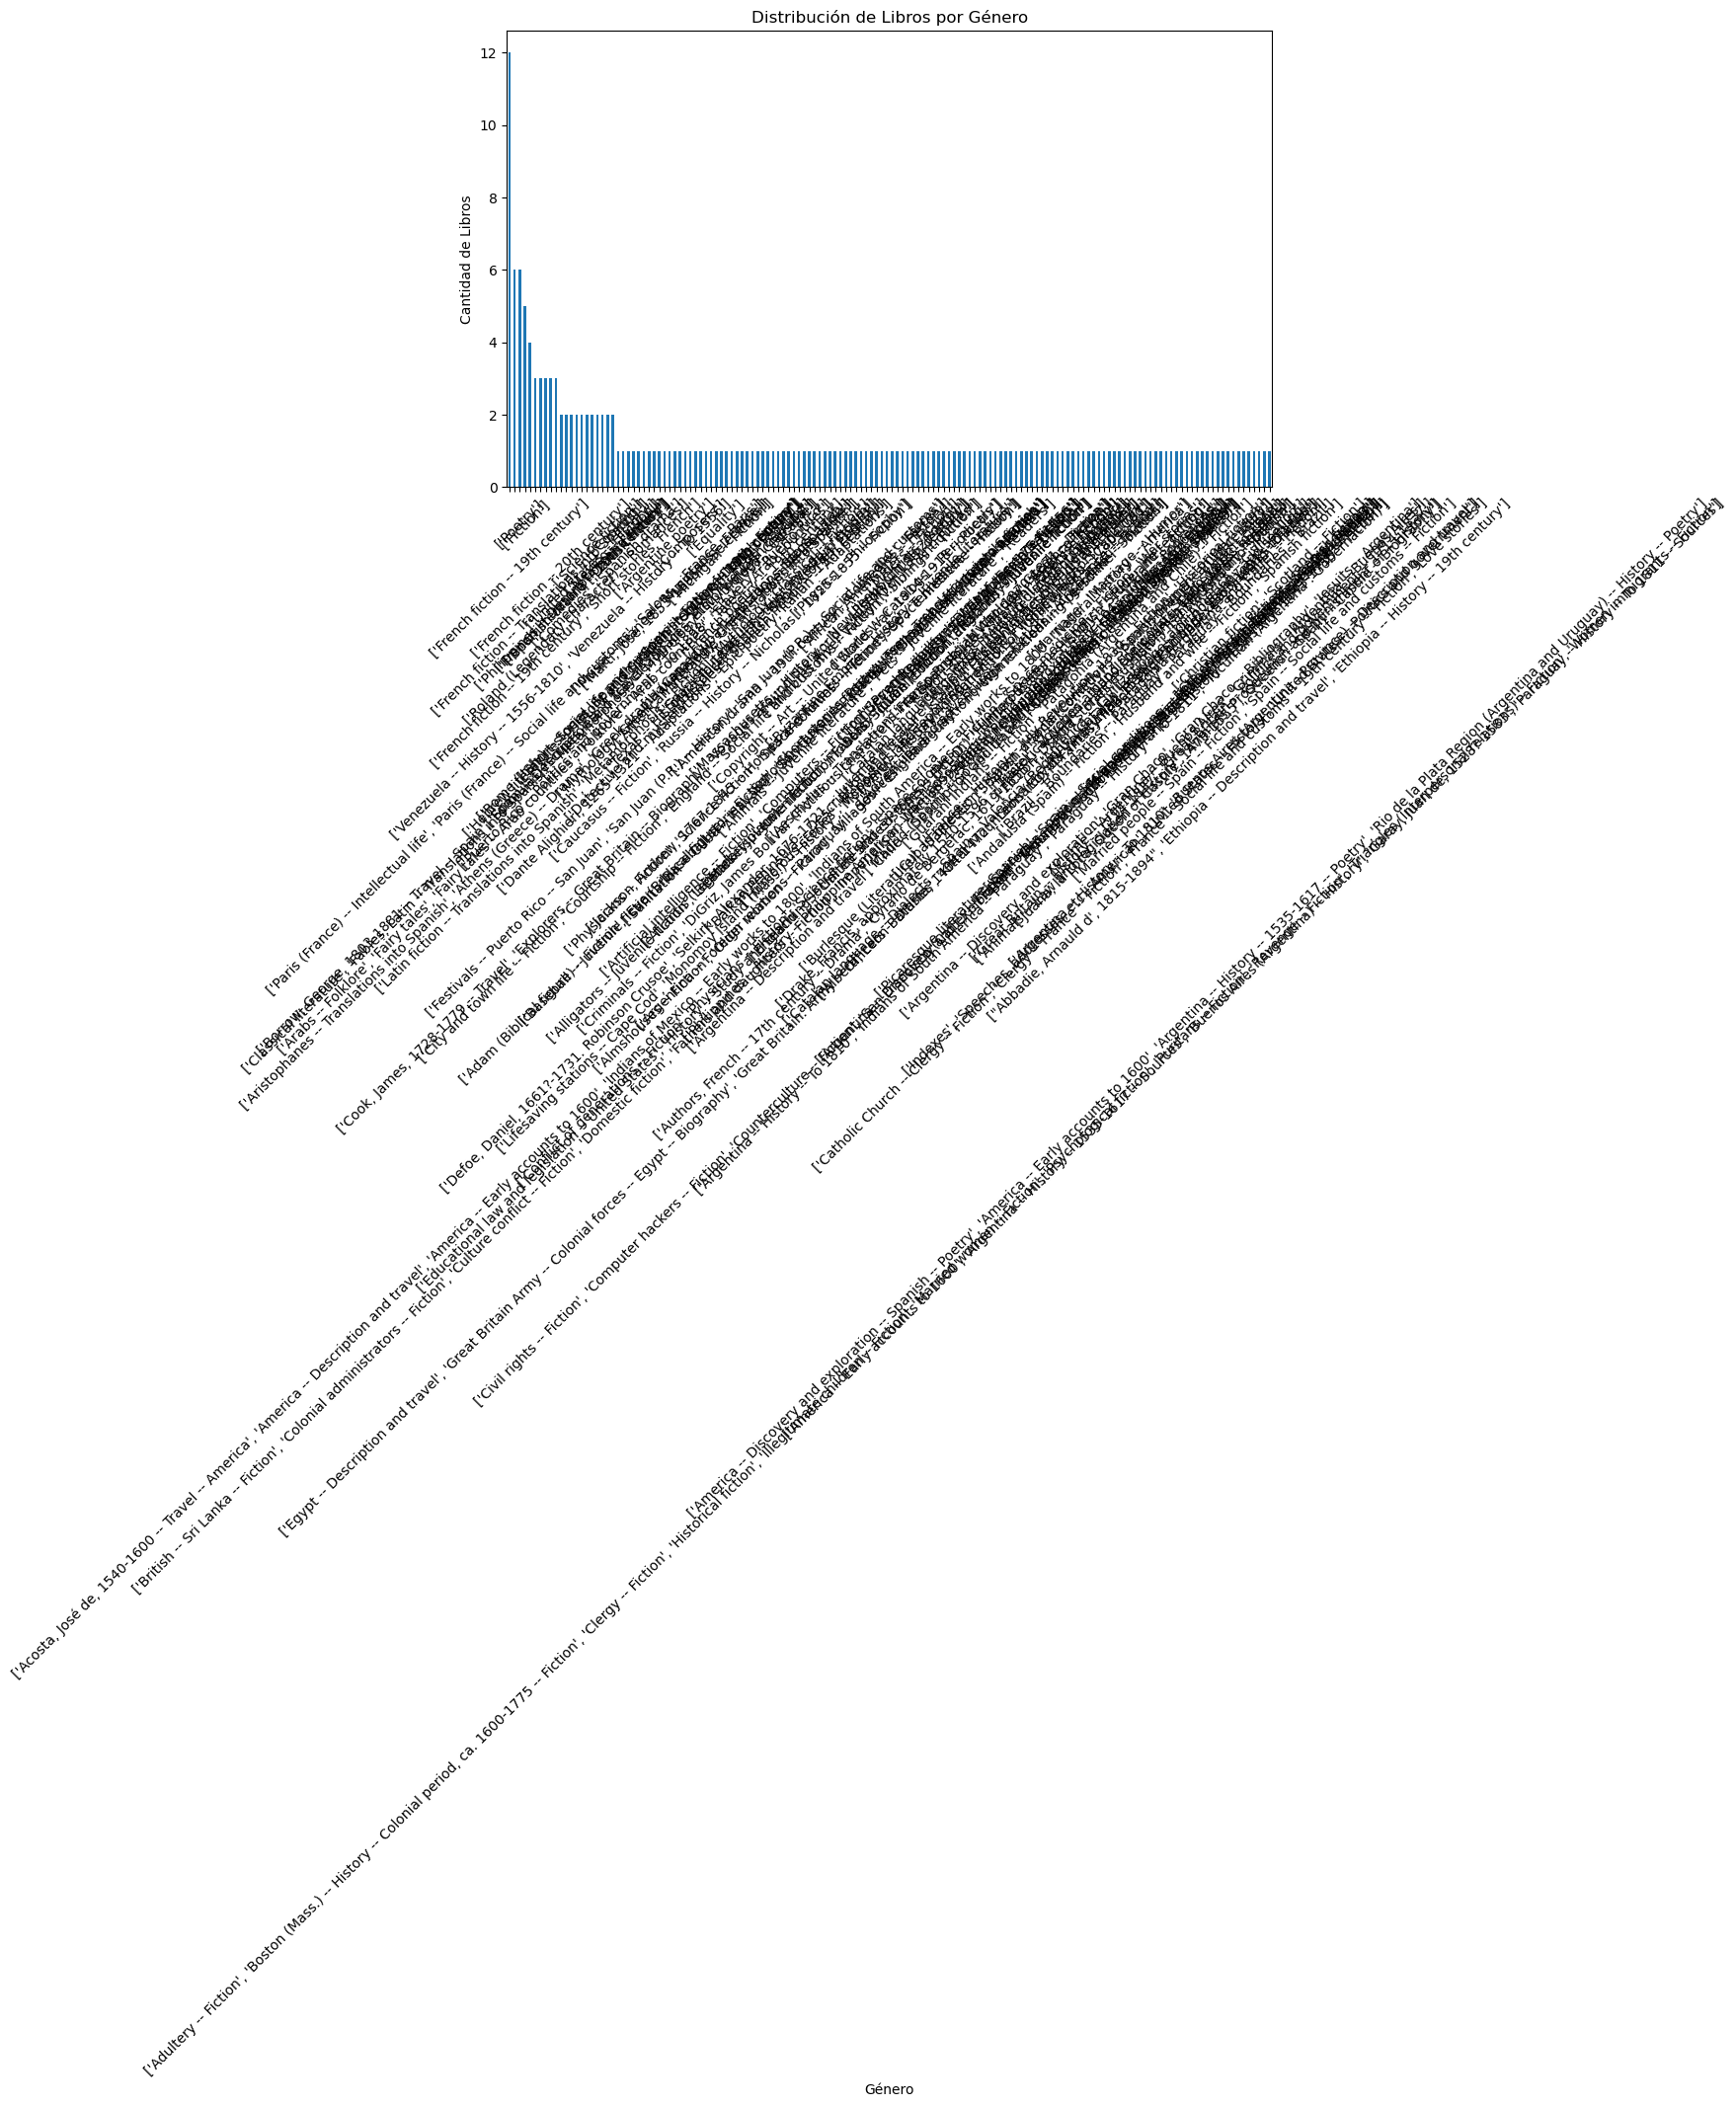

In [15]:
# Cargar el dataframe desde el archivo CSV
df = pd.read_csv('gutenberg.csv')

# Obtener la cuenta de géneros
genre_counts = df['Subjects'].explode().value_counts()

# Generar la gráfica de barras
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Cantidad de Libros')
plt.title('Distribución de Libros por Género')
plt.xticks(rotation=45)
plt.show()
